In [1]:
import nbsetup as nb
import copy
import pickle
import seaborn as sns
import pandas as pd
import itertools
import scipy as sp
import numpy as np
import ensemblepy as ep
import matplotlib.pyplot as plt
from ensemblepy.stats import LEGEND
from ensemblepy.plots import combine_legends

In [2]:
worlds = pickle.load(open('../../datasets/daisy_adjusted.pickle', 'rb'))

In [3]:
x = list(worlds.keys())
obs_temps = np.array([w[0] for w in worlds.values()])
obs_plants = np.array([w[1] for w in worlds.values()])


In [4]:
plants = []
for i, p in enumerate(obs_plants):
    plants.append(ep.Discrete(p, (0,1,2,3)))
    nb.cp(i)

200


In [5]:
mm = (obs_temps.min(), obs_temps.max())
temps = []
for i, t in enumerate(obs_temps):
    temps.append(ep.Continuous(t, mm))
    nb.cp(i)

200


In [6]:
def plot(x, analysis, top, S=3):
    g = sns.lineplot(ax=top, x=x, y=[a.incoherence for a in analysis], label=LEGEND['incoherence'][0], color=LEGEND['incoherence'][1])
    sns.lineplot(ax=top, x=x, y=[1-a.cohesion for a in analysis], label="1 - "+LEGEND['cohesion'][0], color=LEGEND['cohesion'][1])    
    
    divs = []
    for i, a in enumerate(analysis):
        for d in np.unique(np.around(a.divergences, 2)):
            divs.append({'x': x[i], 'y': d, 'hue': a.cohesion})
    divs = pd.DataFrame(divs)
    sns.scatterplot(data=divs, x='x', y='y', hue='hue', s=8, palette='icefire_r', ax=bottom, legend=False)
    bottom.set(ylabel='Radial JS divergences', xlabel='Primary model parameter luminosity')

In [97]:
data = []
for i, t in enumerate(temps):
    mm = np.mean(t.observations)
    for ensemble in t.observations:
        data.append({
            'x': x[i],
            'mean': np.mean(ensemble),
            'max': np.max(ensemble),
            'min': np.min(ensemble),
            'std': np.std(ensemble),
            'meanmean': mm,
        })
temp_data = pd.DataFrame(data)

In [8]:
concise = lambda d, l, func='mean': getattr(d.groupby('x'), func)()[l].to_list()

In [9]:
S = 10
FS = (10,8)

In [286]:
for i, j in enumerate(x):
    if j == 0.79: print(i, j)

69 0.79


In [292]:
data = []
std_std = concise(temp_data, 'std', 'std')
std_mean = concise(temp_data, 'std', 'mean')
for datapoint in range(68,71):
    ens = temps[datapoint]
    
    for row in ens.observations:
        data.append({
            'lum': "%.3f" % x[datapoint],
            'mean': np.mean(row),
            'std': np.std(row),
            'sig(mu)': std_mean[datapoint],
            'sig(sig)': std_std[datapoint],
            'incoherence': ens.incoherence,
        })
    print((x[datapoint], ens.incoherence, std_std[datapoint]))
df_points = pd.DataFrame(data)

(0.785, 0.08567195863973649, 1.1044762755972792)
(0.79, 0.22562261196266697, 0.32657474329465513)
(0.8, 0.048468272668302656, 0.32210719872858373)


[(0.0, 25.0)]

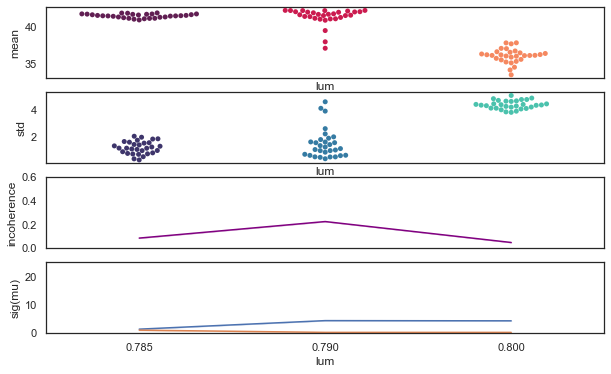

In [293]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,6))
sns.swarmplot(data=df_points, x='lum', y='mean', ax=axes[0], palette="rocket")
sns.swarmplot(data=df_points, x='lum', y='std', ax=axes[1], palette="mako")
sns.lineplot(data=df_points, x='lum', y='incoherence', ax=axes[2], color="purple").set(ylim=(0,0.6))
sns.lineplot(data=df_points, x='lum', y='sig(mu)', ax=axes[3]).set(ylim=(0,25))
sns.lineplot(data=df_points, x='lum', y='sig(sig)', ax=axes[3]).set(ylim=(0,25))

In [ ]:
def ridge(ens):
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [278]:
x[77]

0.8300000000000001

[[],
 Text(0.5, 0, 'Trial run'),
 Text(0.5, 1.0, 'Individual temperatures for each trial run for luminosity 0.83')]

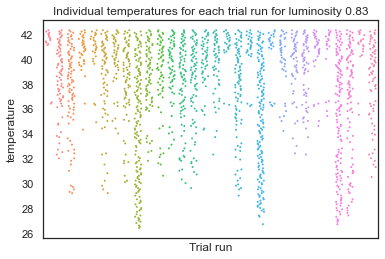

In [289]:
ens = temps[69]
data = []
for e, row in enumerate(ens.observations):
    for v in np.unique(row.round(1)):
        data.append({'temperature': v, 'ensemble': str(e)})

g = sns.stripplot(data=pd.DataFrame(data), y="temperature", x="ensemble", s=2, jitter=0.3)
g.set(xticks=[], xlabel="Trial run", title="Individual temperatures for each trial run for luminosity 0.83")
#g.figure.savefig('seven-nine.eps')

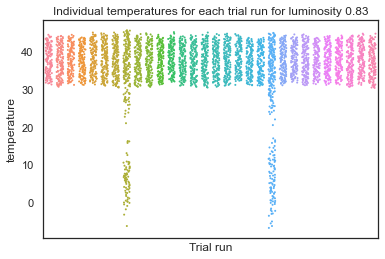

In [288]:
ens = temps[77]
data = []
for e, row in enumerate(ens.observations):
    for v in np.unique(row.round(1)):
        data.append({'temperature': v, 'ensemble': str(e)})

g = sns.stripplot(data=pd.DataFrame(data), y="temperature", x="ensemble", s=2, jitter=0.3)
g.set(xticks=[], xlabel="Trial run", title="Individual temperatures for each trial run for luminosity 0.83")
g.figure.savefig('seven-nine.eps')

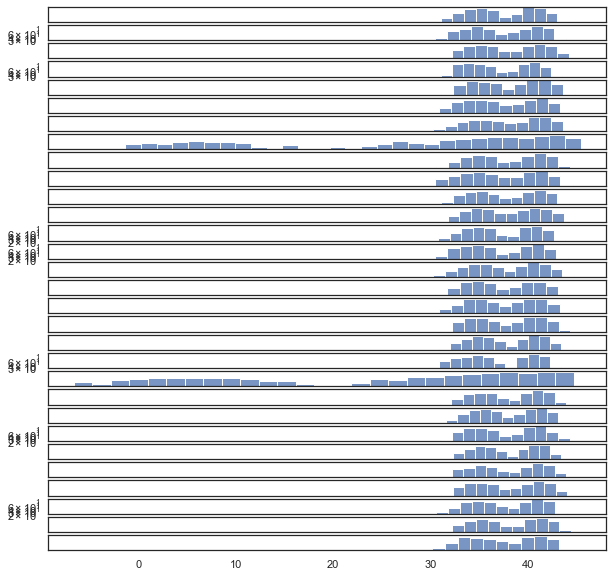

In [251]:
ens = temps[77]
fig, axes = plt.subplots(len(ens.observations), 1, sharex=True, figsize=(10,10))
for i, row in enumerate(ens.observations):
    g = sns.histplot(row, ax=axes[i])
    g.set(yscale="log", yticks=[], ylabel=None)

In [221]:
data = []
for datapoint in range(75,81):
    ens = temps[datapoint]
    for i, row in enumerate(ens.observations):
        for obs in row:
            data.append({
                "lum": x[datapoint],
                "value": obs,
                "ensemble": i,
            })
obs_points = pd.DataFrame(data)

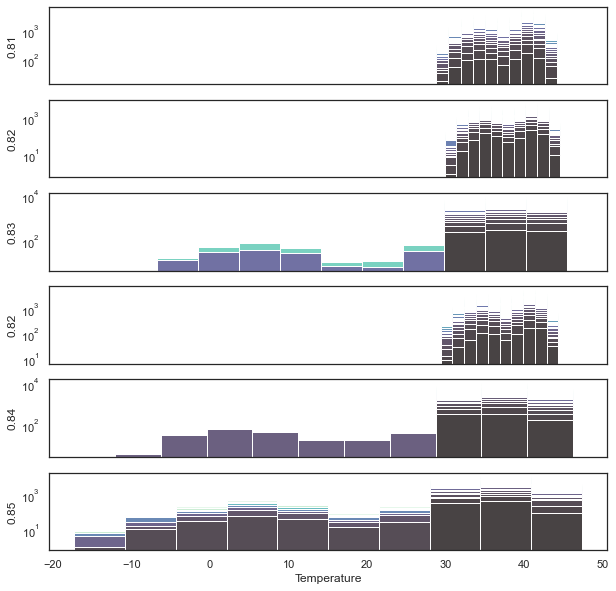

In [223]:
fig, axes = plt.subplots(6, 1, sharex=True, figsize=(10,10))
for i, j in enumerate(obs_points.lum.unique()):
    sns.histplot(ax=axes[i], data=obs_points[obs_points['lum']==j], bins=10, x="value", hue="ensemble", multiple="stack", legend=False, palette="mako_r").set(yscale="log", xlabel="Temperature", ylabel="%.2f" % j)

In [40]:
from scipy.stats import kruskal, f_oneway

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially 

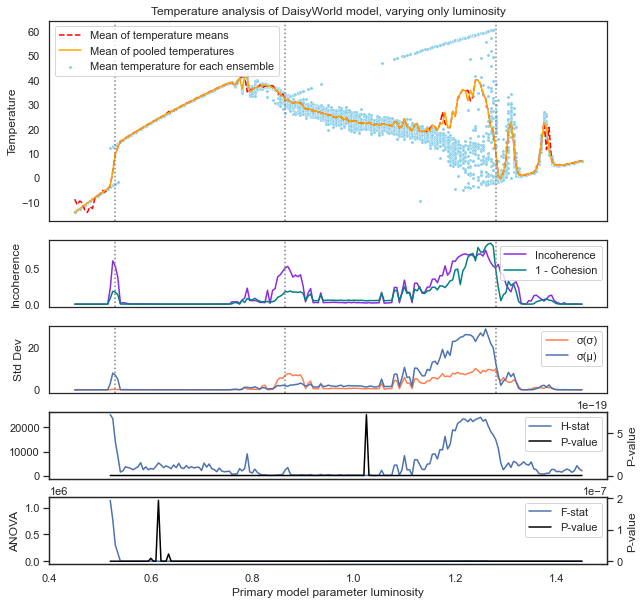

In [316]:
sns.set_theme(style="white")
fig, (top, inco, mid, kax, aax) = plt.subplots(5, 1, sharex=True, figsize=(10,10), gridspec_kw={'height_ratios':[3, 1, 1, 1, 1]})

# top
sns.scatterplot(data=temp_data, x='x', y='mean', s=S, ax=top, color='skyblue', label='Mean temperature for each ensemble')
sns.lineplot(x=x, y=concise(temp_data, 'mean'), ax=top, label='Mean of temperature means', linestyle='dashed',color='red')
sns.lineplot(x=x, y=[np.mean(t) for t in obs_temps], ax=top, label='Mean of pooled temperatures', color='orange')
top.set(title='Temperature analysis of DaisyWorld model, varying only luminosity', ylabel='Temperature')
top.legend(loc='upper left')
top.axvline(0.53, color='grey', linestyle='dotted')
top.axvline(0.865, color='grey', linestyle='dotted')
top.axvline(1.28, color='grey', linestyle='dotted')

# inco
l = sns.lineplot(ax=inco, x=x, y=[a.incoherence for a in temps], label=LEGEND['incoherence'][0], color=LEGEND['incoherence'][1])
sns.lineplot(ax=inco, x=x, y=[1-a.cohesion for a in temps], label="1 - "+LEGEND['cohesion'][0], color=LEGEND['cohesion'][1])    
inco.set(ylabel="Incoherence")
inco.axvline(0.53, color='grey', linestyle='dotted')
inco.axvline(0.865, color='grey', linestyle='dotted')
inco.axvline(1.28, color='grey', linestyle='dotted')

# mid
sns.lineplot(x=x, y=concise(temp_data, 'std', 'std'), ax=mid, color='coral',label="σ(σ)")
sns.lineplot(x=x, y=concise(temp_data, 'mean', 'std'), ax=mid, label="σ(μ)")
mid.set(ylabel="Std Dev")
mid.axvline(0.53, color='grey', linestyle='dotted')
mid.axvline(0.865, color='grey', linestyle='dotted')
mid.axvline(1.28, color='grey', linestyle='dotted')

# kruskal
kx = []
ky = []
kyp = []
for i, a in enumerate(temps):
    try:
        first, second = kruskal(*a.normalised)
    except:
        pass
    else:
        ky.append(first)
        kyp.append(second)
        kx.append(x[i])
l = sns.lineplot(ax=kax, x=kx, y=ky, label="H-stat")
twin = kax.twinx()
r = sns.lineplot(ax=twin, x=kx, y=kyp, color='black', label='P-value')
twin.set(ylabel="P-value")
combine_legends(l,r)
aax.set(ylabel="Kruskal")

# anova
l = sns.lineplot(ax=aax, x=x, y=[f_oneway(*a.normalised)[0] for a in temps], label="F-stat")
twin = aax.twinx()
r = sns.lineplot(ax=twin, x=x, y=[f_oneway(*a.normalised)[1] for a in temps], label="P-value", color="black")
twin.set(ylabel="P-value")
combine_legends(l,r)

aax.set(xlabel='Primary model parameter luminosity', ylabel='ANOVA')

fig.savefig('temperature.eps')

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially 

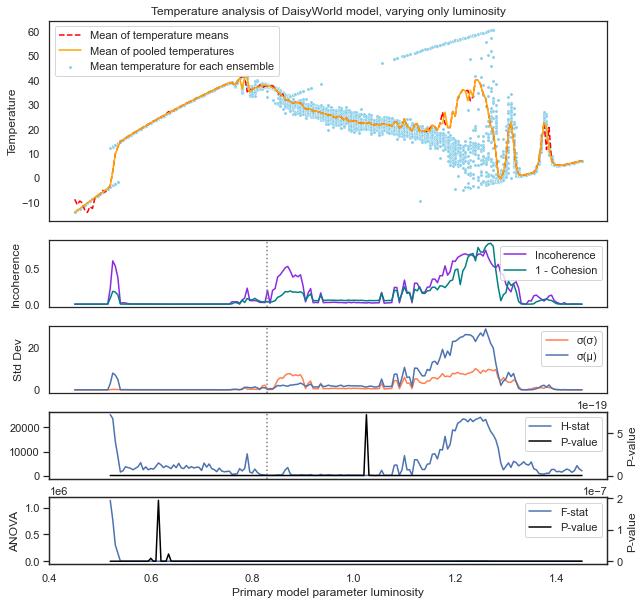

In [298]:
sns.set_theme(style="white")
fig, (top, inco, mid, kax, aax) = plt.subplots(5, 1, sharex=True, figsize=(10,10), gridspec_kw={'height_ratios':[3, 1, 1, 1, 1]})

# top
sns.scatterplot(data=temp_data, x='x', y='mean', s=S, ax=top, color='skyblue', label='Mean temperature for each ensemble')
sns.lineplot(x=x, y=concise(temp_data, 'mean'), ax=top, label='Mean of temperature means', linestyle='dashed',color='red')
sns.lineplot(x=x, y=[np.mean(t) for t in obs_temps], ax=top, label='Mean of pooled temperatures', color='orange')
top.set(title='Temperature analysis of DaisyWorld model, varying only luminosity', ylabel='Temperature')
top.legend(loc='upper left')

# inco
l = sns.lineplot(ax=inco, x=x, y=[a.incoherence for a in temps], label=LEGEND['incoherence'][0], color=LEGEND['incoherence'][1])
inco.set(ylabel="Incoherence")
inco.axvline(0.83, color='grey', linestyle='dotted')

# mid
sns.lineplot(x=x, y=concise(temp_data, 'std', 'std'), ax=mid, color='coral',label="σ(σ)")
sns.lineplot(x=x, y=concise(temp_data, 'mean', 'std'), ax=mid, label="σ(μ)")
mid.set(ylabel="Std Dev")
mid.axvline(0.83, color='grey', linestyle='dotted')

# kruskal
kx = []
ky = []
kyp = []
for i, a in enumerate(temps):
    try:
        first, second = kruskal(*a.normalised)
    except:
        pass
    else:
        ky.append(first)
        kyp.append(second)
        kx.append(x[i])
l = sns.lineplot(ax=kax, x=kx, y=ky, label="H-stat")
twin = kax.twinx()
r = sns.lineplot(ax=twin, x=kx, y=kyp, color='black', label='P-value')
twin.set(ylabel="P-value")
combine_legends(l,r)
aax.set(ylabel="Kruskal")
kax.axvline(0.83, color='grey', linestyle='dotted')

# anova
l = sns.lineplot(ax=aax, x=x, y=[f_oneway(*a.normalised)[0] for a in temps], label="F-stat")
twin = aax.twinx()
r = sns.lineplot(ax=twin, x=x, y=[f_oneway(*a.normalised)[1] for a in temps], label="P-value", color="black")
twin.set(ylabel="P-value")
combine_legends(l,r)

aax.set(xlabel='Primary model parameter luminosity', ylabel='ANOVA')

fig.savefig('4.4-daisy-scan.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


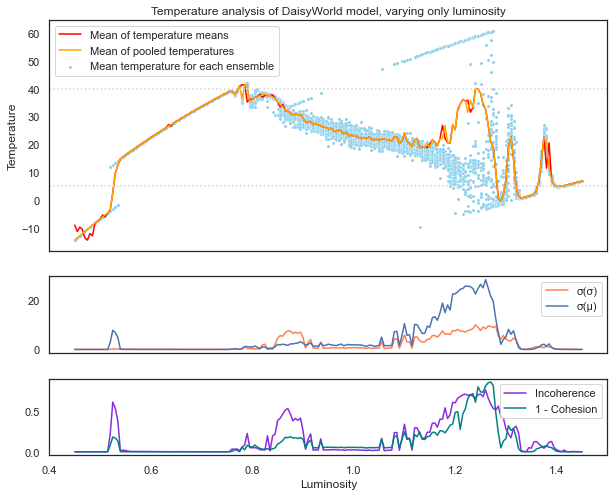

In [326]:
fig, (top, mid, lower) = plt.subplots(3, 1, sharex=True, figsize=FS, gridspec_kw={'height_ratios':[3, 1,1]})

# top
sns.scatterplot(data=temp_data, x='x', y='mean', s=S, ax=top, color='skyblue', label='Mean temperature for each ensemble')
sns.lineplot(x=x, y=concise(temp_data, 'mean'), ax=top, label='Mean of temperature means', color='red')
sns.lineplot(x=x, y=[np.mean(t) for t in obs_temps], ax=top, label='Mean of pooled temperatures', color='orange')
top.set(title='Temperature analysis of DaisyWorld model, varying only luminosity', ylabel='Temperature')
top.axhline(y=40, color='lightgrey', linestyle='dotted')
top.axhline(y=5, color='lightgrey', linestyle='dotted')
top.legend(loc='upper left')
# mid
sns.lineplot(x=x, y=concise(temp_data, 'std', 'std'), ax=mid, color='coral',label="σ(σ)")
sns.lineplot(x=x, y=concise(temp_data, 'mean', 'std'), ax=mid, label="σ(μ)")

# bottom
g = sns.lineplot(ax=lower, x=x, y=[a.incoherence for a in temps], label=LEGEND['incoherence'][0], color=LEGEND['incoherence'][1])
sns.lineplot(ax=lower, x=x, y=[1-a.cohesion for a in temps], label="1 - "+LEGEND['cohesion'][0], color=LEGEND['cohesion'][1])    
g.set(xlabel='Luminosity')

fig.savefig('temperature.eps')

In [15]:
data = []
for i, p in enumerate(plants):
    for m in p.histograms:
        data.append({
            'x': x[i],
            'Empty': m[0],
            'White': m[1],
            'Black': m[2],
        })
plant_data = pd.DataFrame(data)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


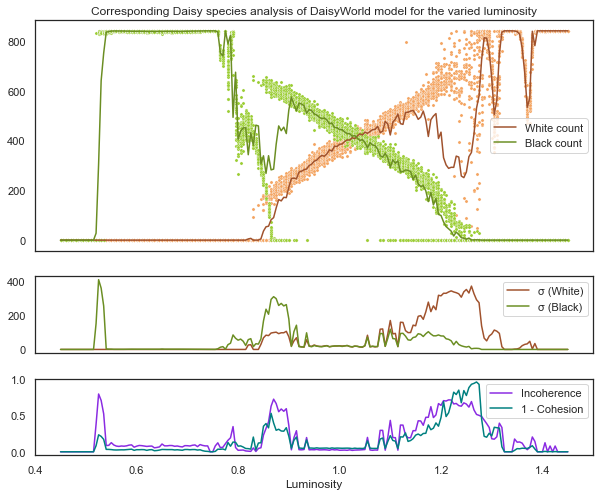

In [323]:
fig, (top, mid, lower) = plt.subplots(3, 1, sharex=True, figsize=FS, gridspec_kw={'height_ratios':[3, 1,1]})

top.set(title='Corresponding Daisy species analysis of DaisyWorld model for the varied luminosity')
keys = {'White': ('sienna', 'sandybrown'), 'Black': ('olivedrab', 'yellowgreen')}#, 'Empty': ('cornflowerblue', 'royalblue')}
for k, (line, point) in keys.items():
    g = sns.scatterplot(data=plant_data, x='x', y=k, s=S, ax=top, color=point)
    sns.lineplot(x=x, y=concise(plant_data, k), ax=top, color=line, label='%s count' % k)
    sns.lineplot(x=x, y=concise(plant_data, k, 'std'), color=line, ax=mid, label='σ (%s)' % k)
top.legend(loc='center right')
g.set(ylabel='')
    
# lower
g = sns.lineplot(ax=lower, x=x, y=[a.incoherence for a in plants], label=LEGEND['incoherence'][0], color=LEGEND['incoherence'][1])
sns.lineplot(ax=lower, x=x, y=[1-a.cohesion for a in plants], label="1 - "+LEGEND['cohesion'][0], color=LEGEND['cohesion'][1])    
g.set(xlabel='Luminosity')
fig.savefig('plants.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


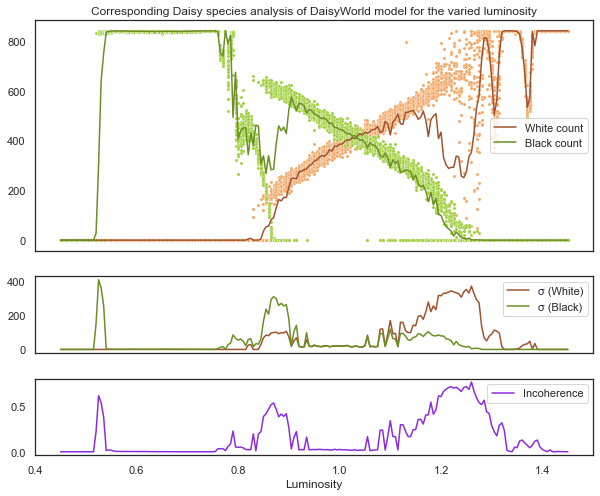

In [145]:
fig, (top, mid, lower) = plt.subplots(3, 1, sharex=True, figsize=FS, gridspec_kw={'height_ratios':[3, 1,1]})

top.set(title='Corresponding Daisy species analysis of DaisyWorld model for the varied luminosity')
keys = {'White': ('sienna', 'sandybrown'), 'Black': ('olivedrab', 'yellowgreen')}#,'Empty': ('cornflowerblue', 'royalblue')}
for k, (line, point) in keys.items():
    g = sns.scatterplot(data=plant_data, x='x', y=k, s=S, ax=top, color=point)
    sns.lineplot(x=x, y=concise(plant_data, k), ax=top, color=line, label='%s count' % k)
    sns.lineplot(x=x, y=concise(plant_data, k, 'std'), color=line, ax=mid, label='σ (%s)' % k)
top.legend(loc='center right')
g.set(ylabel='')
    
# bottom
g = sns.lineplot(ax=lower, x=x, y=[a.incoherence for a in temps], label=LEGEND['incoherence'][0], color=LEGEND['incoherence'][1])
#sns.lineplot(ax=lower, x=x, y=[1-a.cohesion for a in temps], label="1 - "+LEGEND['cohesion'][0], color=LEGEND['cohesion'][1])    
g.set(xlabel='Luminosity')
fig.savefig('plants-incoherence.eps')